# <span style="color: #fda32c;">🌍 Introduction</span>

### <div style="background-color: #fda32c; color: black; padding: 10px; border-radius: 15px; text-align: center;"> In this project, we aim to analyze customer data to uncover meaningful patterns and segments that can inform targeted marketing strategies. Since our dataset does not include any predefined target variables, we will employ unsupervised learning techniques, specifically using the K-Means clustering algorithm for modeling.</div>


# <span style="color: #fda32c;">🔑 Key Features</span>

### Here's an overview of the key columns in the dataset:

**💳 BALANCE**: The current amount owed by the cardholder.</br>
**📅 BALANCE_FREQUENCY**: How regularly the balance is updated (values between 0 and 1).</br>
**💸 PURCHASES**: The total amount spent using the credit card.</br>
**🛍️ ONEOFF_PURCHASES**: Total amount of non-installment purchases in a single transaction.</br>
**📆 INSTALLMENTS_PURCHASES**: Total purchases made through installment payments.</br>
**💵 CASH_ADVANCE**: Total amount of cash withdrawals made from the credit card.</br>
**📊 PURCHASES_FREQUENCY**: Frequency of purchases over time.</br>
**🔄 ONEOFF_PURCHASES_FREQUENCY**: How often single, one-off purchases are made.</br>
**💳 CREDIT_LIMIT**: The upper limit of the credit available to the cardholder.</br>
**💰 PAYMENTS**: The total payments made towards the credit card balance.</br>
**⚖️ MINIMUM_PAYMENTS**: Minimum required payments made on the credit balance.</br>
**🔢 PRC_FULL_PAYMENT**: Proportion of times full balance payment was made.</br>
**⏳ TENURE**: The duration of time (in months) the credit card has been active.</br>

# <span style="color: #fda32c;">📘 Import Library</span>

In [ ]:
import os
import re
import math
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, pairwise_distances
from colorama import Fore, Style
from kneed import KneeLocator

# Suppress warnings
warnings.filterwarnings("ignore")

# <span style="color: #fda32c;">📥 Read Data</span>

In [2]:
# Correct the file path by removing extra quotes
Data=pd.read_csv(r'C:\Users\Sharare\Desktop\IMT\cluster\Customer_Data.csv')
df=pd.DataFrame(Data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# <span style="color: #fda32c;">🛠️ Data Preprocessing</span>

In [3]:
print(df.dtypes)

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


# <span style="color: #fda32c;">❓ Missing Value</span>

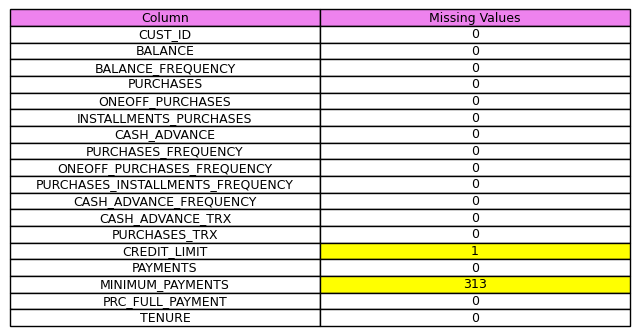

In [4]:
# Calculate the number of missing values
missing_values = df.isnull().sum()

# Convert the information into a DataFrame
missing_df = missing_values.reset_index()
missing_df.columns = ['Column', 'Missing Values']

# Display the DataFrame as a table using matplotlib
plt.figure(figsize=(8, 4))
table = plt.table(cellText=missing_df.values,
                  colLabels=missing_df.columns,
                  cellLoc='center',
                  loc='center')

# Remove axes
plt.axis('off')

# Add color to columns with missing values
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_facecolor('violet')  # Violet for header cells

for i, row in missing_df.iterrows():
    if row['Missing Values'] > 0:
        cell = table[i + 1, 1]  # i + 1 to skip the header row
        cell.set_facecolor('yellow')  # Yellow for cells with missing values

plt.show()

# <span style="color: #fda32c;">Handle Missing Values</span>
Reason:</br>
&emsp;1-Drops rows with missing CREDIT_LIMIT values to maintain data integrity.</br>
&emsp;2-Removes irrelevant columns like CUST_ID since it does not provide meaningful information for clustering.</br>
&emsp;3-Standardizes the numeric data for better clustering results.

In [5]:
df1 = df[df['CREDIT_LIMIT'].isnull()]
df1

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [6]:
df.drop(index=5203, inplace=True)

In [7]:
df.drop("CUST_ID", axis=1, inplace=True)

## Correlation Analysis
Reason:</br>
&emsp;&emsp;Calculates and visualizes correlations between MINIMUM_PAYMENTS and other features to understand feature relationships and their impact.


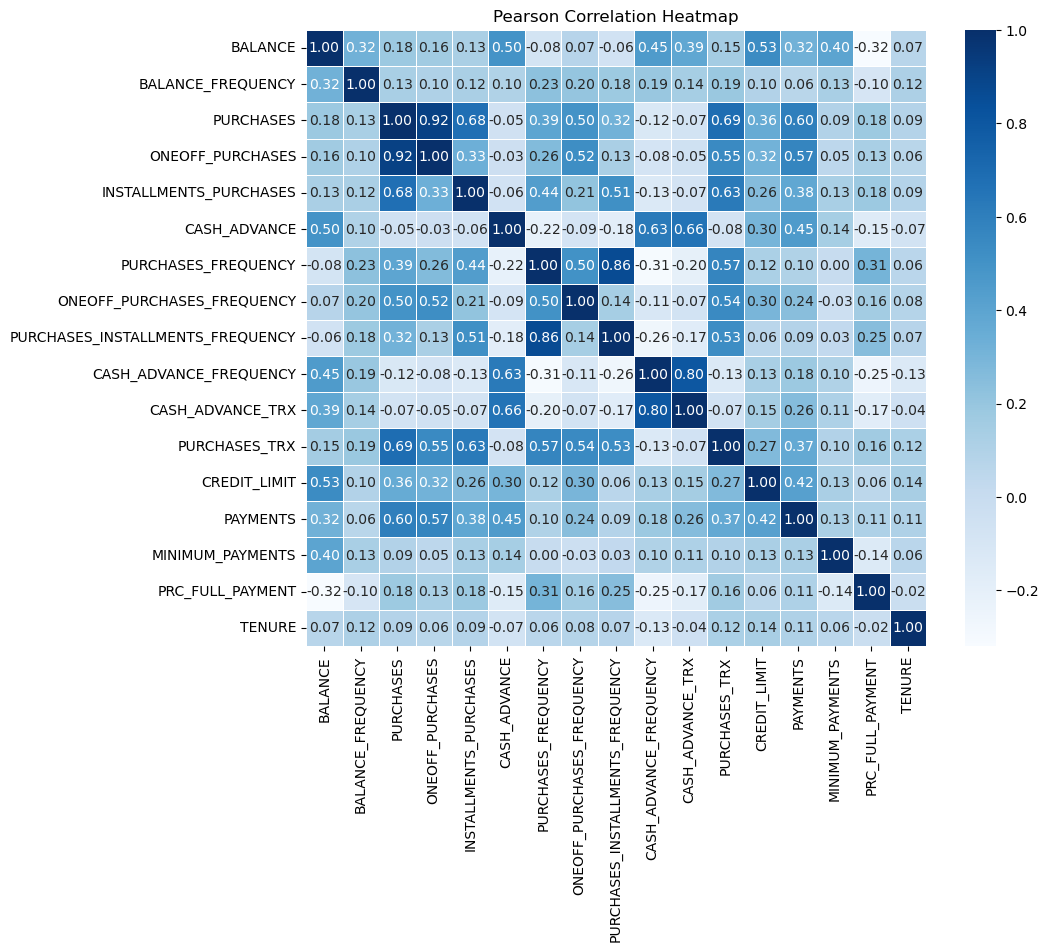

In [8]:
# Calculate Pearson correlation coefficient
pear_corr = df.corr(method='pearson')

# Display the correlation matrix with color mapping
plt.figure(figsize=(10, 8))
sns.heatmap(pear_corr, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()


In [9]:
df.corr()['MINIMUM_PAYMENTS'].sort_values(ascending=False)

MINIMUM_PAYMENTS                    1.000000
BALANCE                             0.398669
CASH_ADVANCE                        0.140094
BALANCE_FREQUENCY                   0.132519
INSTALLMENTS_PURCHASES              0.132156
CREDIT_LIMIT                        0.126671
PAYMENTS                            0.126630
CASH_ADVANCE_TRX                    0.109727
CASH_ADVANCE_FREQUENCY              0.098844
PURCHASES_TRX                       0.096311
PURCHASES                           0.093842
TENURE                              0.059330
ONEOFF_PURCHASES                    0.048741
PURCHASES_INSTALLMENTS_FREQUENCY    0.030036
PURCHASES_FREQUENCY                 0.002979
ONEOFF_PURCHASES_FREQUENCY         -0.030357
PRC_FULL_PAYMENT                   -0.140404
Name: MINIMUM_PAYMENTS, dtype: float64

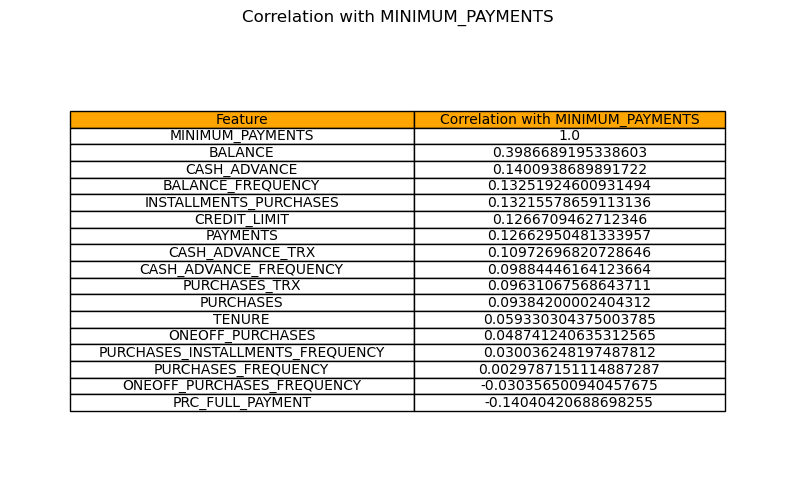

In [10]:
# Calculate correlation coefficients for the column MINIMUM_PAYMENTS
correlations = df.corr()['MINIMUM_PAYMENTS'].sort_values(ascending=False)

# Convert the correlation data into a DataFrame
correlation_df = pd.DataFrame(correlations)
correlation_df.reset_index(inplace=True)
correlation_df.columns = ['Feature', 'Correlation with MINIMUM_PAYMENTS']

# Display the DataFrame as a table using matplotlib
plt.figure(figsize=(10, 6))
plt.axis('tight')
plt.axis('off')
plt.title('Correlation with MINIMUM_PAYMENTS')

table = plt.table(cellText=correlation_df.values,
                  colLabels=correlation_df.columns,
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(correlation_df.columns))))

# Highlight the header row
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_facecolor('orange')

plt.show()

<Axes: xlabel='MINIMUM_PAYMENTS'>

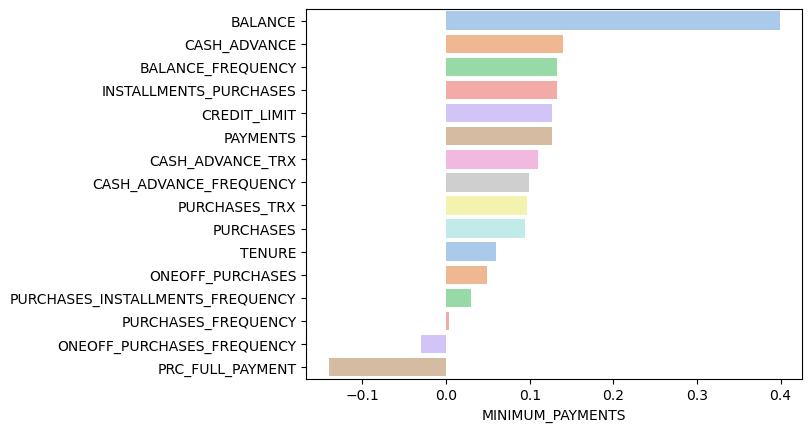

In [11]:
corr =df.corr()
corr = corr.MINIMUM_PAYMENTS
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "pastel")

In [12]:
df.loc[df['PAYMENTS'] == 0, 'MINIMUM_PAYMENTS'] = 0

In [13]:
df.isnull().sum()

BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    73
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

In [14]:
df1=df.copy()

In [15]:
df2=df.copy()

<div style="background-color: #f9f9f9; border-left: 6px solid #fda32c; padding: 10px; border-radius: 5px; font-family: Arial, sans-serif;">
    <h3 style="color: #fda32c;">🛒 Categorize Purchases</h3>
    <p>
        <strong>Reason:</strong><br>
        This part of the code:
        <ul>
            <li><strong>Defines thresholds:</strong> Categorizes the <code>PURCHASES</code> feature into three levels:
                <ol>
                    <li><strong>1:</strong> Low spenders (less than 1000).</li>
                    <li><strong>2:</strong> Medium spenders (between 1000 and 5000).</li>
                    <li><strong>3:</strong> High spenders (above 5000).</li>
                </ol>
            </li>
            <li><strong>Groups customers:</strong> Helps in creating meaningful segments for analysis.</li>
            <li><strong>Adds a new column:</strong> The <code>PURCHASES_CATEGORY</code> column is created to store these categorizations.</li>
        </ul>
        This categorization simplifies customer analysis by grouping spending behaviors into manageable levels.
    </p>
</div>


In [16]:
# Define a function to map values to labels
def LB_PURCHASES(x):
    if x < 1000:
        return '1'
    elif x < 5000:
        return '2'
    else:
        return '3'

# Apply the function to the column
df2['PURCHASES_CATEGORY'] = df2['PURCHASES'].apply(LB_PURCHASES)

# Display the first few rows of the DataFrame
df2.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE PURCHASES_CATEGORY  
0   201.802084        139.509787          0.000000      12                  1  
1  4103.032597       1072.340217          0.222222      12                  1  
2   622.066742        627.284787          0.000000      12                  1  
3     0.000000          0.000000          0.000000      12                  2  
4   678.334763        244.791237          0.000000      12                  1

<div style="background-color: #f9f9f9; border-left: 6px solid #fda32c; padding: 10px; border-radius: 5px; font-family: Arial, sans-serif;">
    <h3 style="color: #fda32c;">Fill Missing Values in MINIMUM_PAYMENTS</h3>
    <p>
        <strong>Reason:</strong><br>
        This part of the code:
        <ul>
            <li><strong>Handles Missing Values:</strong>
                <ul>
                    <li>Identifies missing values in the <code>MINIMUM_PAYMENTS</code> column.</li>
                    <li>Imputes them by calculating the mean for each <code>PURCHASES_CATEGORY</code> (low, medium, high spenders).</li>
                </ul>
            </li>
            <li><strong>Groups by Category:</strong>
                <ul>
                    <li>Ensures that missing values are filled based on customer spending behavior, preserving the relevance of the imputed values.</li>
                </ul>
            </li>
            <li><strong>Improves Data Quality:</strong>
                <ul>
                    <li>Fills missing values to ensure complete data for analysis and clustering.</li>
                </ul>
            </li>
        </ul>
        This approach ensures that the imputed values are contextually relevant for each customer group.
    </p>
</div>


In [ ]:
# Fill NaN values in the 'MINIMUM_PAYMENTS' column based on the mean of the column for each category
df2.loc[df2['PURCHASES_CATEGORY'] == '1', 'MINIMUM_PAYMENTS'] = df2[df2['PURCHASES_CATEGORY'] == '1']['MINIMUM_PAYMENTS'].fillna(
    df2[df2['PURCHASES_CATEGORY'] == '1']['MINIMUM_PAYMENTS'].mean())
df2.loc[df2['PURCHASES_CATEGORY'] == '2', 'MINIMUM_PAYMENTS'] = df2[df2['PURCHASES_CATEGORY'] == '2']['MINIMUM_PAYMENTS'].fillna(
    df2[df2['PURCHASES_CATEGORY'] == '2']['MINIMUM_PAYMENTS'].mean())
df2.loc[df2['PURCHASES_CATEGORY'] == '3', 'MINIMUM_PAYMENTS'] = df2[df2['PURCHASES_CATEGORY'] == '3']['MINIMUM_PAYMENTS'].fillna(
    df2[df2['PURCHASES_CATEGORY'] == '3']['MINIMUM_PAYMENTS'].mean())

# Display the count of NaN values in df2
print(df2.isnull().sum())

<div style="background-color: #f9f9f9; border-left: 6px solid #fda32c; padding: 10px; border-radius: 5px; font-family: Arial, sans-serif;">
    <h3 style="color: #fda32c;">Visualize Data</h3>
    <p>
        <strong>Reason:</strong>
        <ul>
            <li><strong>Histograms:</strong>
                <ul>
                    <li>Provide an overview of the distribution for each feature (e.g., skewness, spread).</li>
                    <li>Useful for identifying data ranges and trends.</li>
                </ul>
            </li>
            <li><strong>Boxplots:</strong>
                <ul>
                    <li>Show variability and outliers in each feature.</li>
                    <li>Help to assess the range and consistency of data.</li>
                </ul>
            </li>
            <li><strong>Pairplot:</strong>
                <ul>
                    <li>Displays pairwise relationships between features.</li>
                    <li>Useful for identifying patterns or correlations between variables.</li>
                </ul>
            </li>
        </ul>
    </p>
</div>


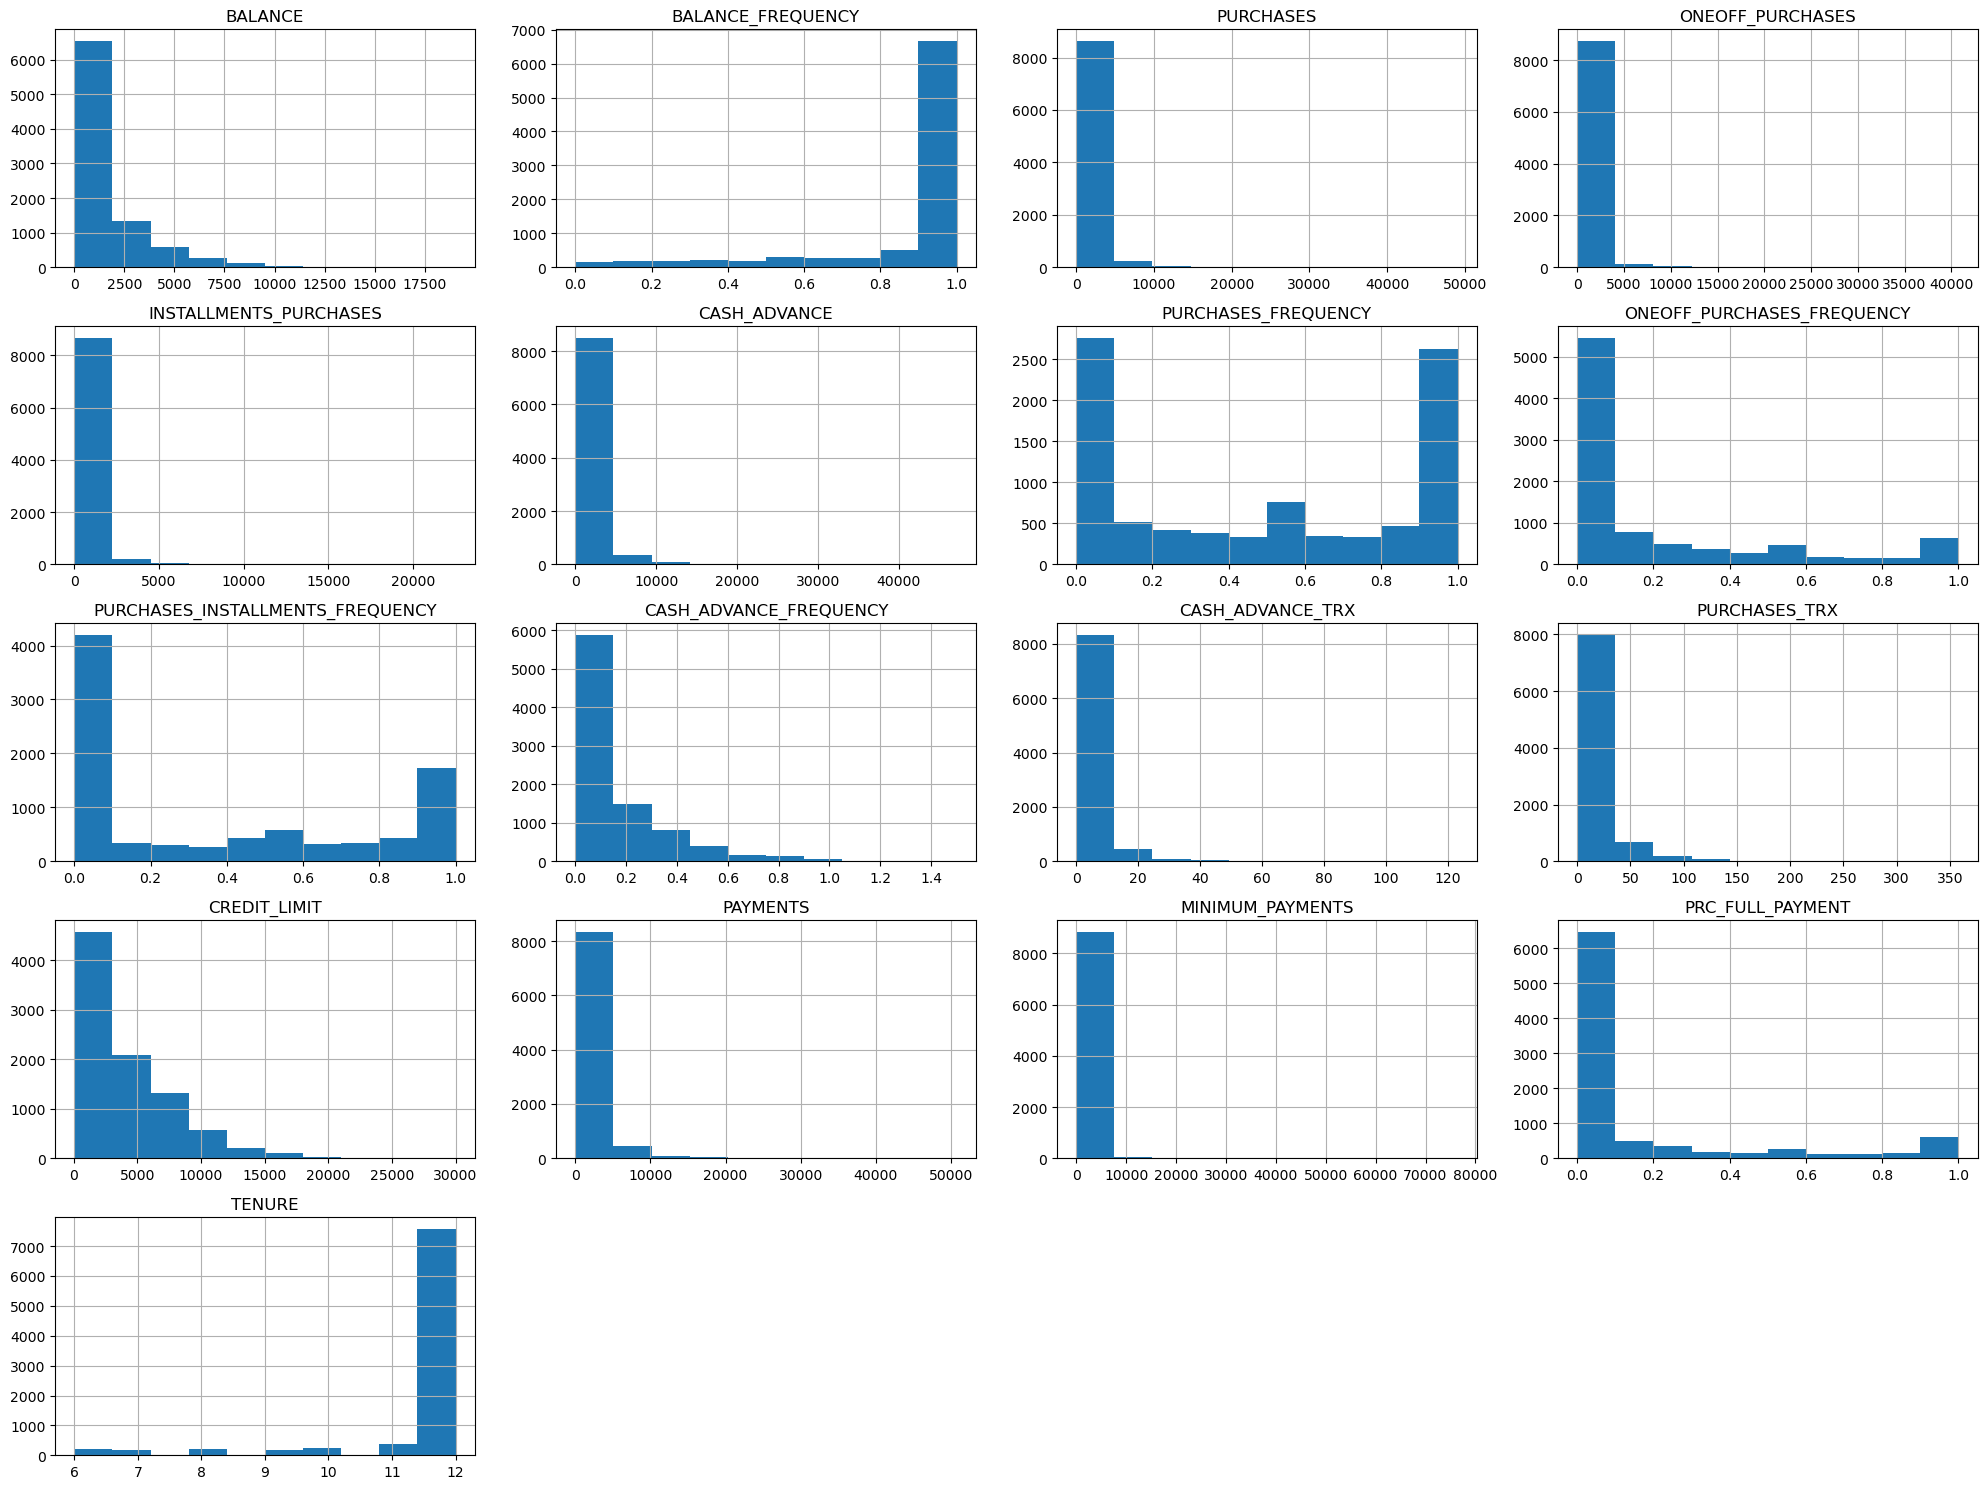

In [18]:
# Plot histograms for all features in the DataFrame
df2[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
     'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
     'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
     'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
     'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].hist(figsize=(20, 15))

plt.tight_layout()
plt.show()

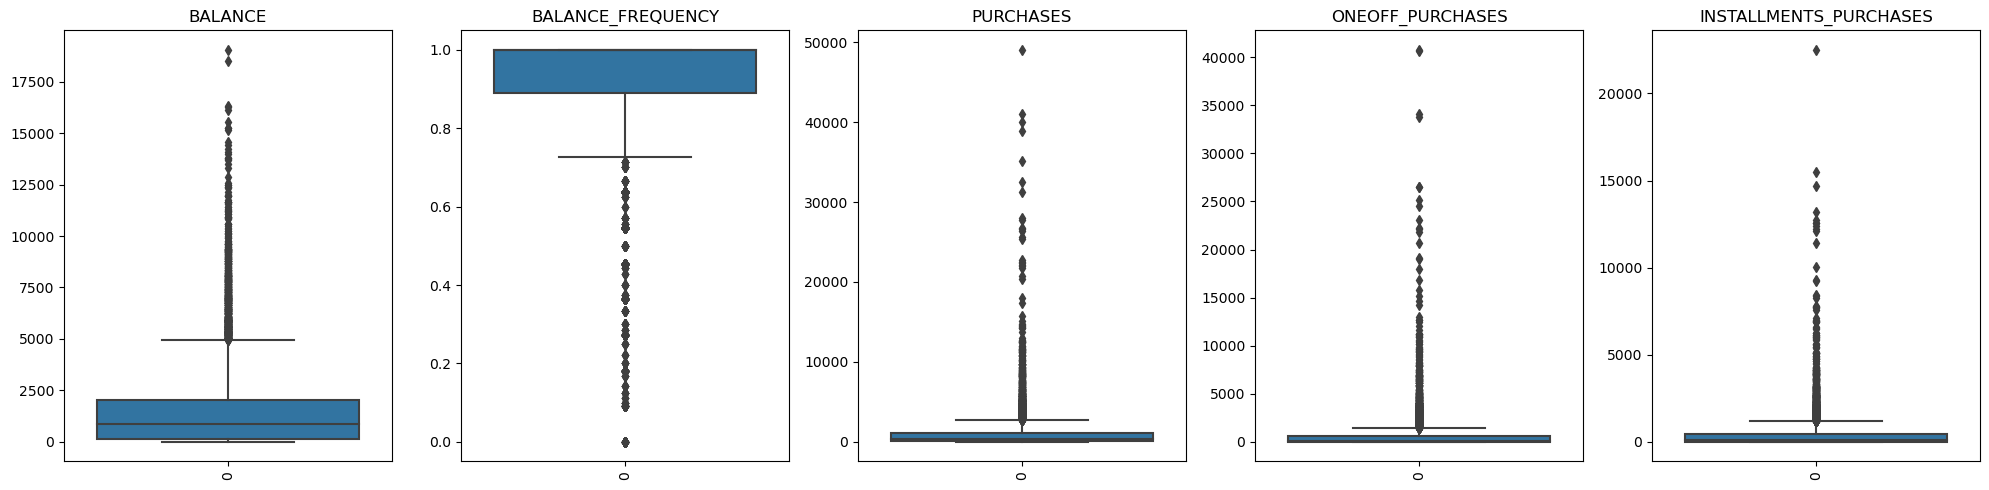

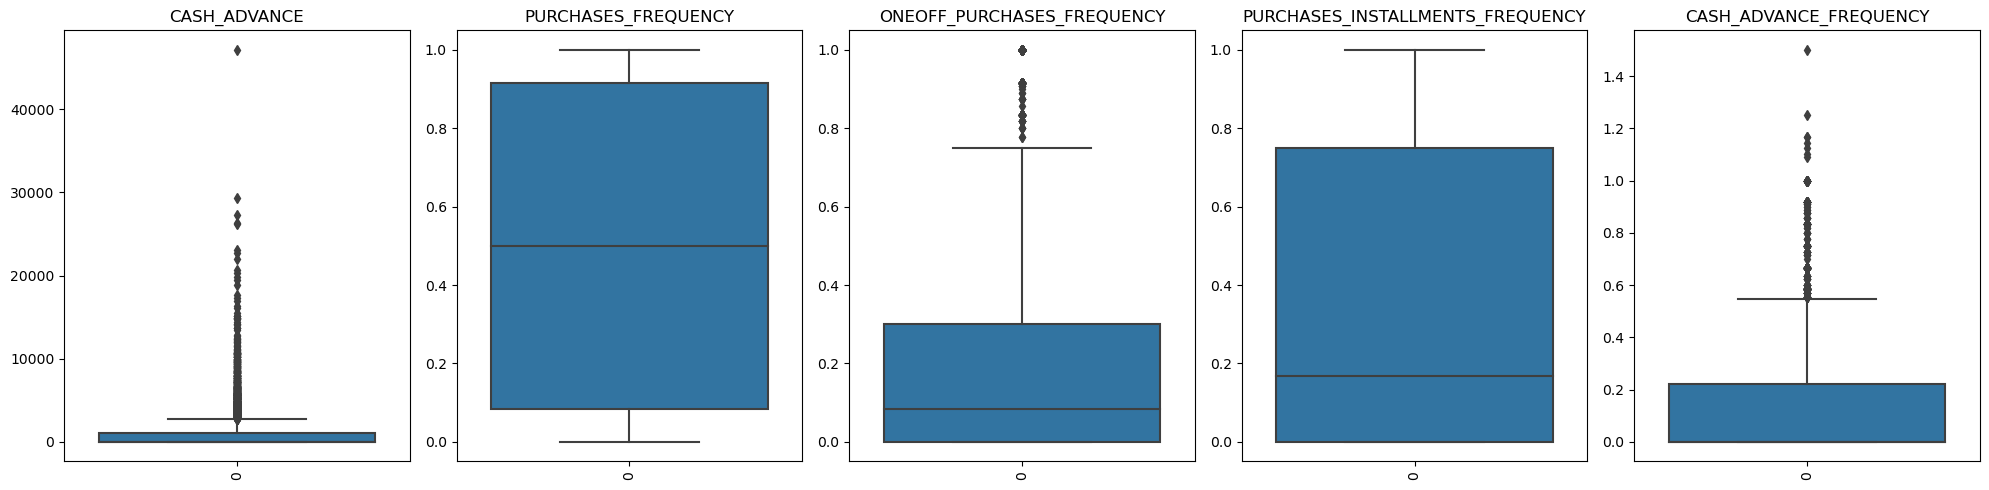

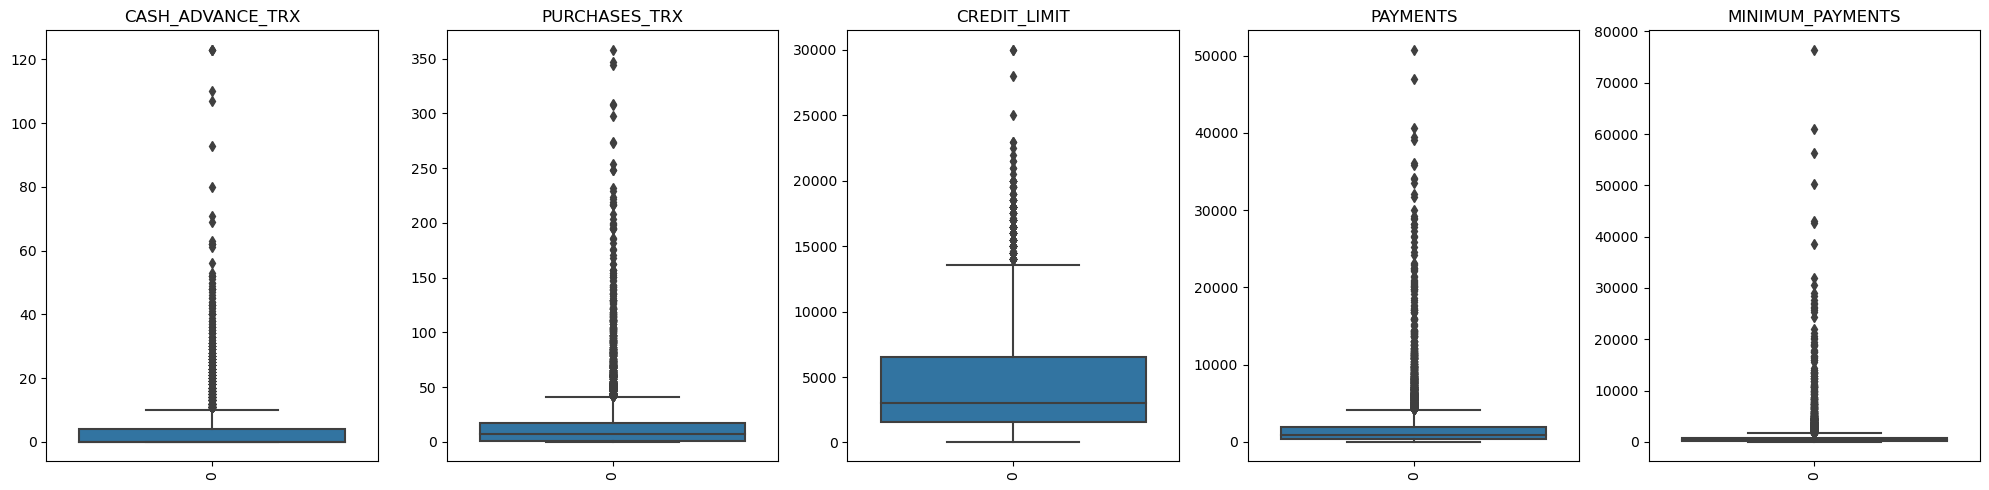

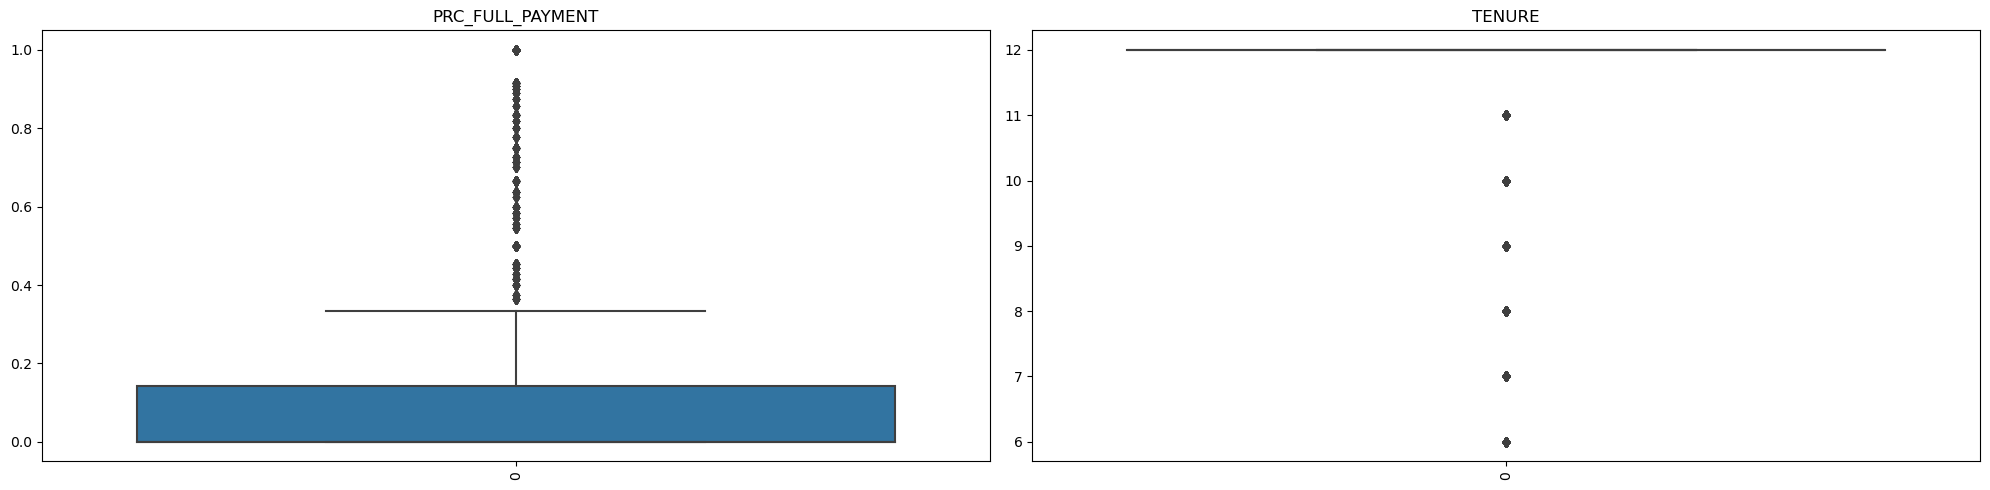

In [19]:
selected_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                    'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                    'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Divide column names into three groups for displaying in three rows
columns_sets = [selected_columns[i:i + 5] for i in range(0, len(selected_columns), 5)]

for i, columns in enumerate(columns_sets):
    plt.figure(figsize=(20, 5))
    for j, column in enumerate(columns):
        plt.subplot(1, len(columns), j + 1)
        sns.boxplot(data=df2[column])
        plt.title(column)
        plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.tight_layout()
    plt.show()

<Axes: >

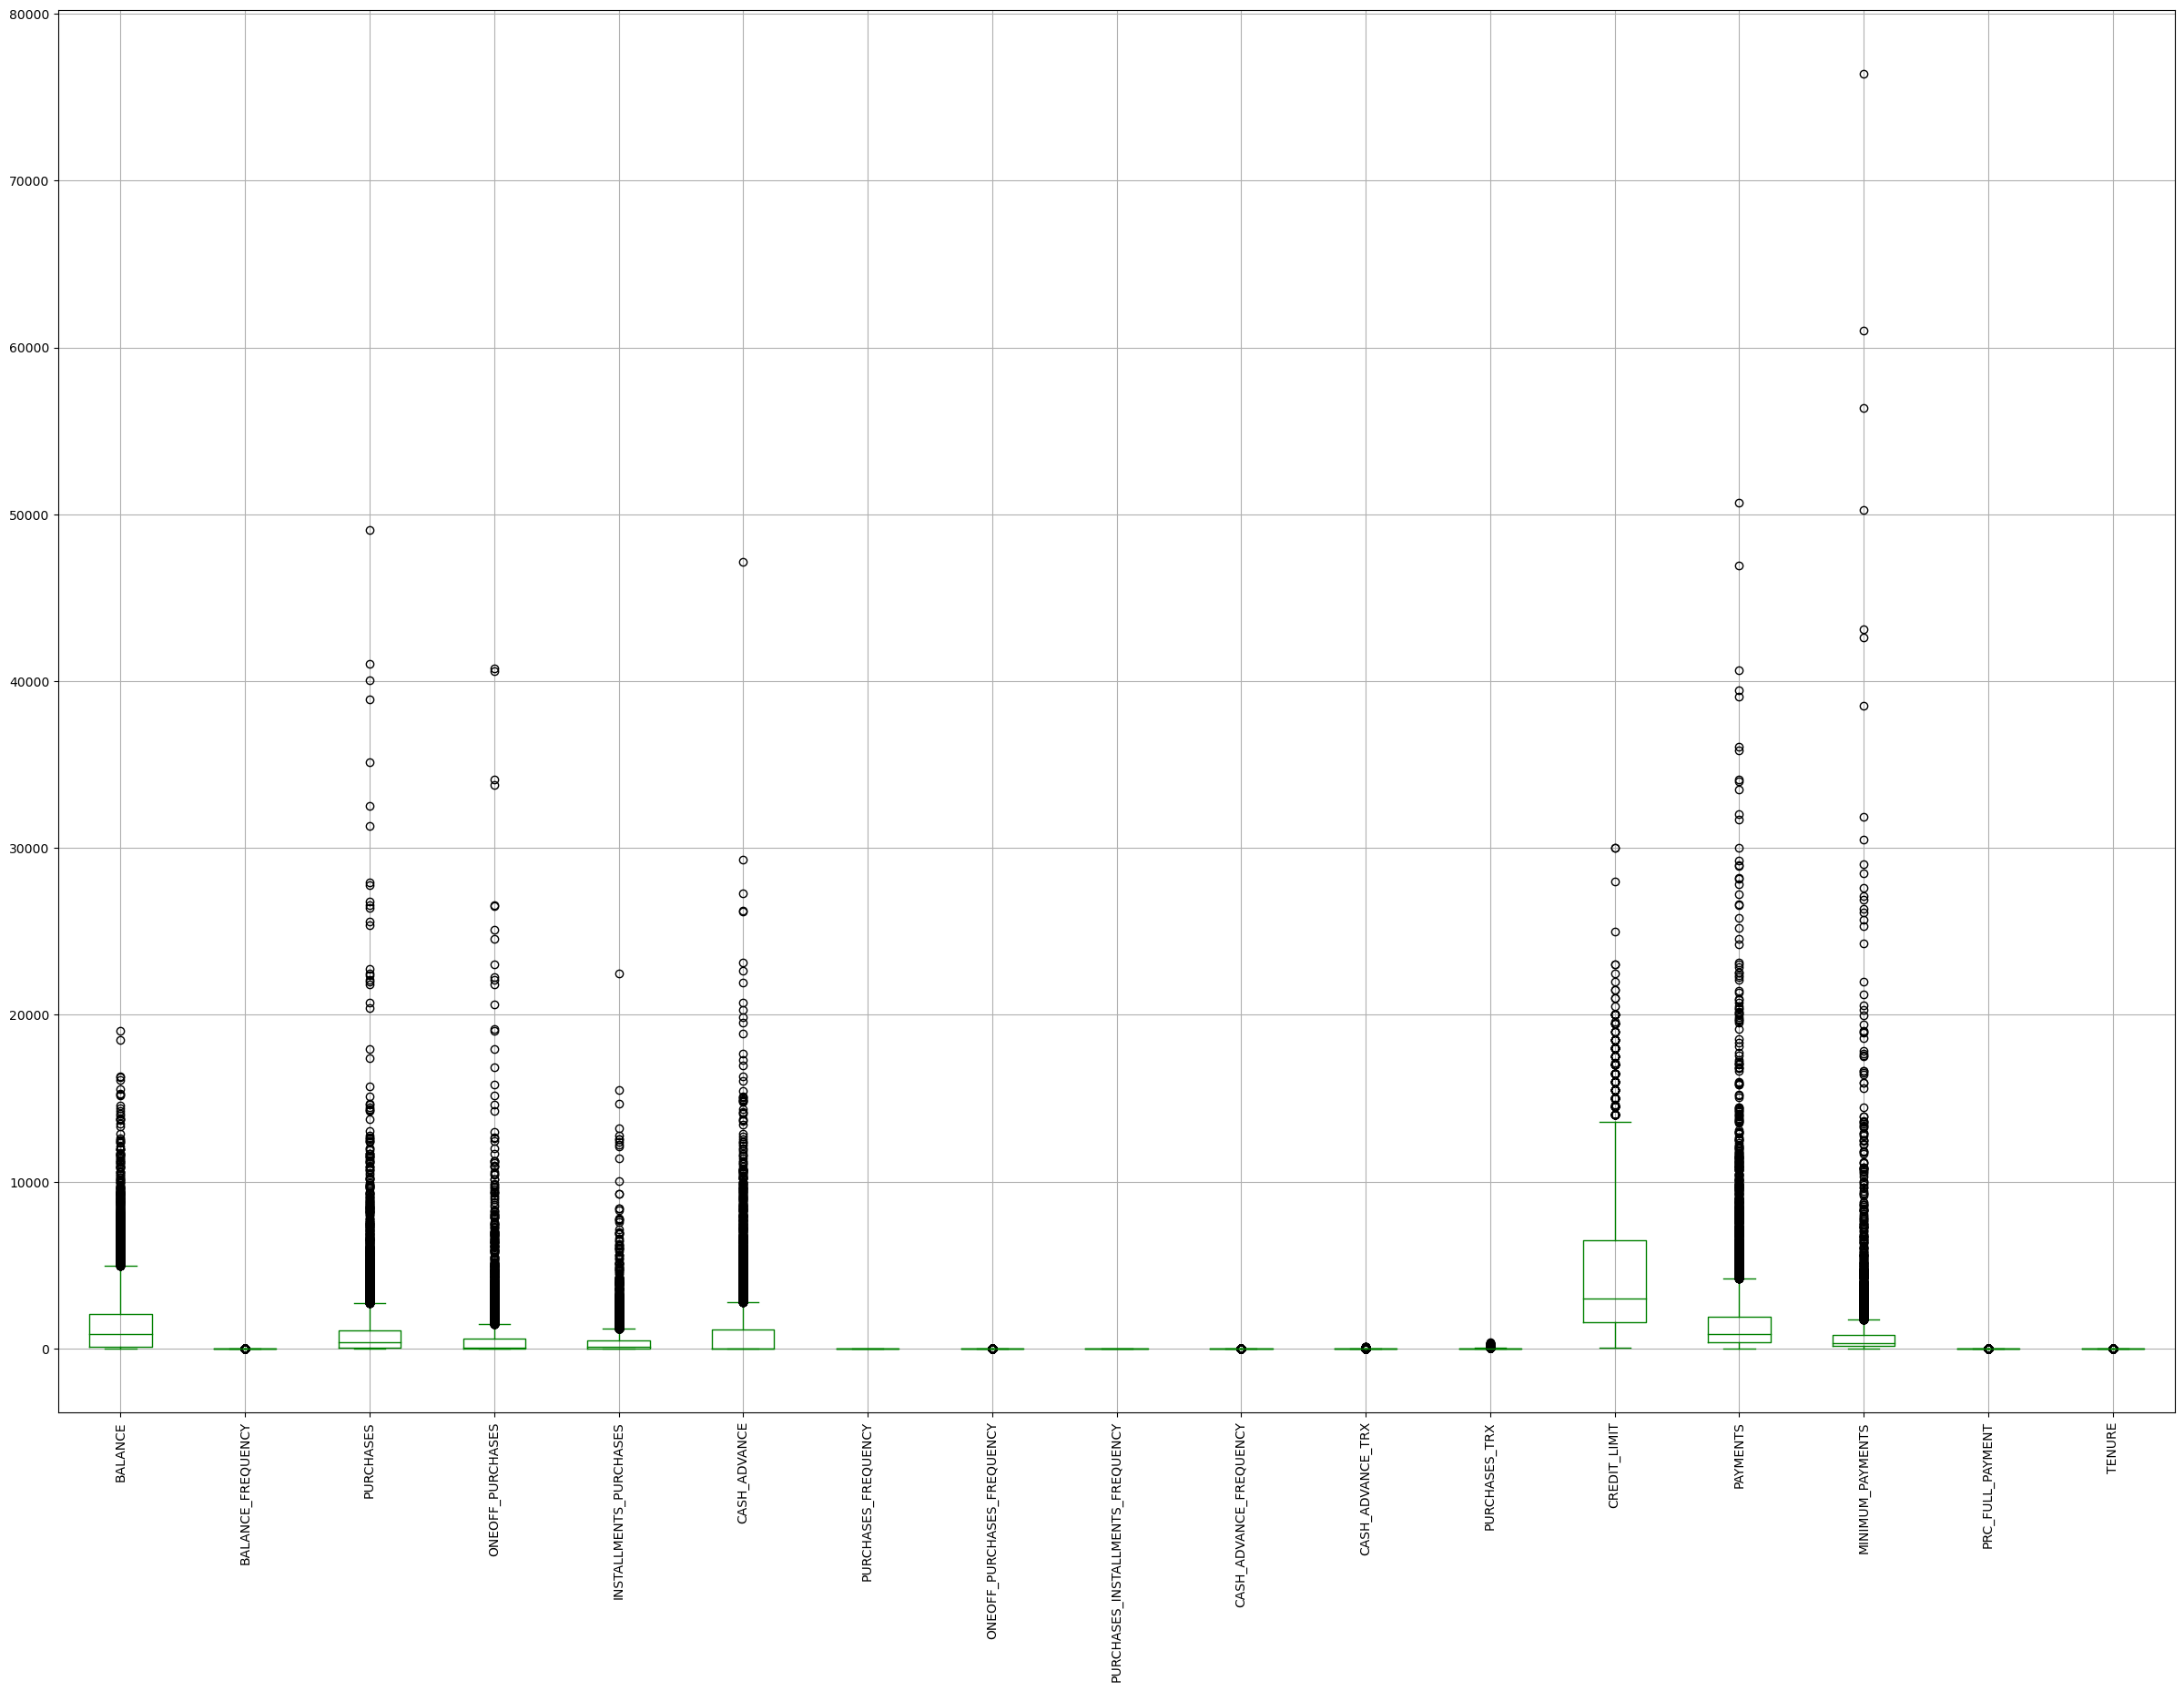

In [20]:
df2.boxplot(rot=90 , figsize=(30,20) , color = "green")

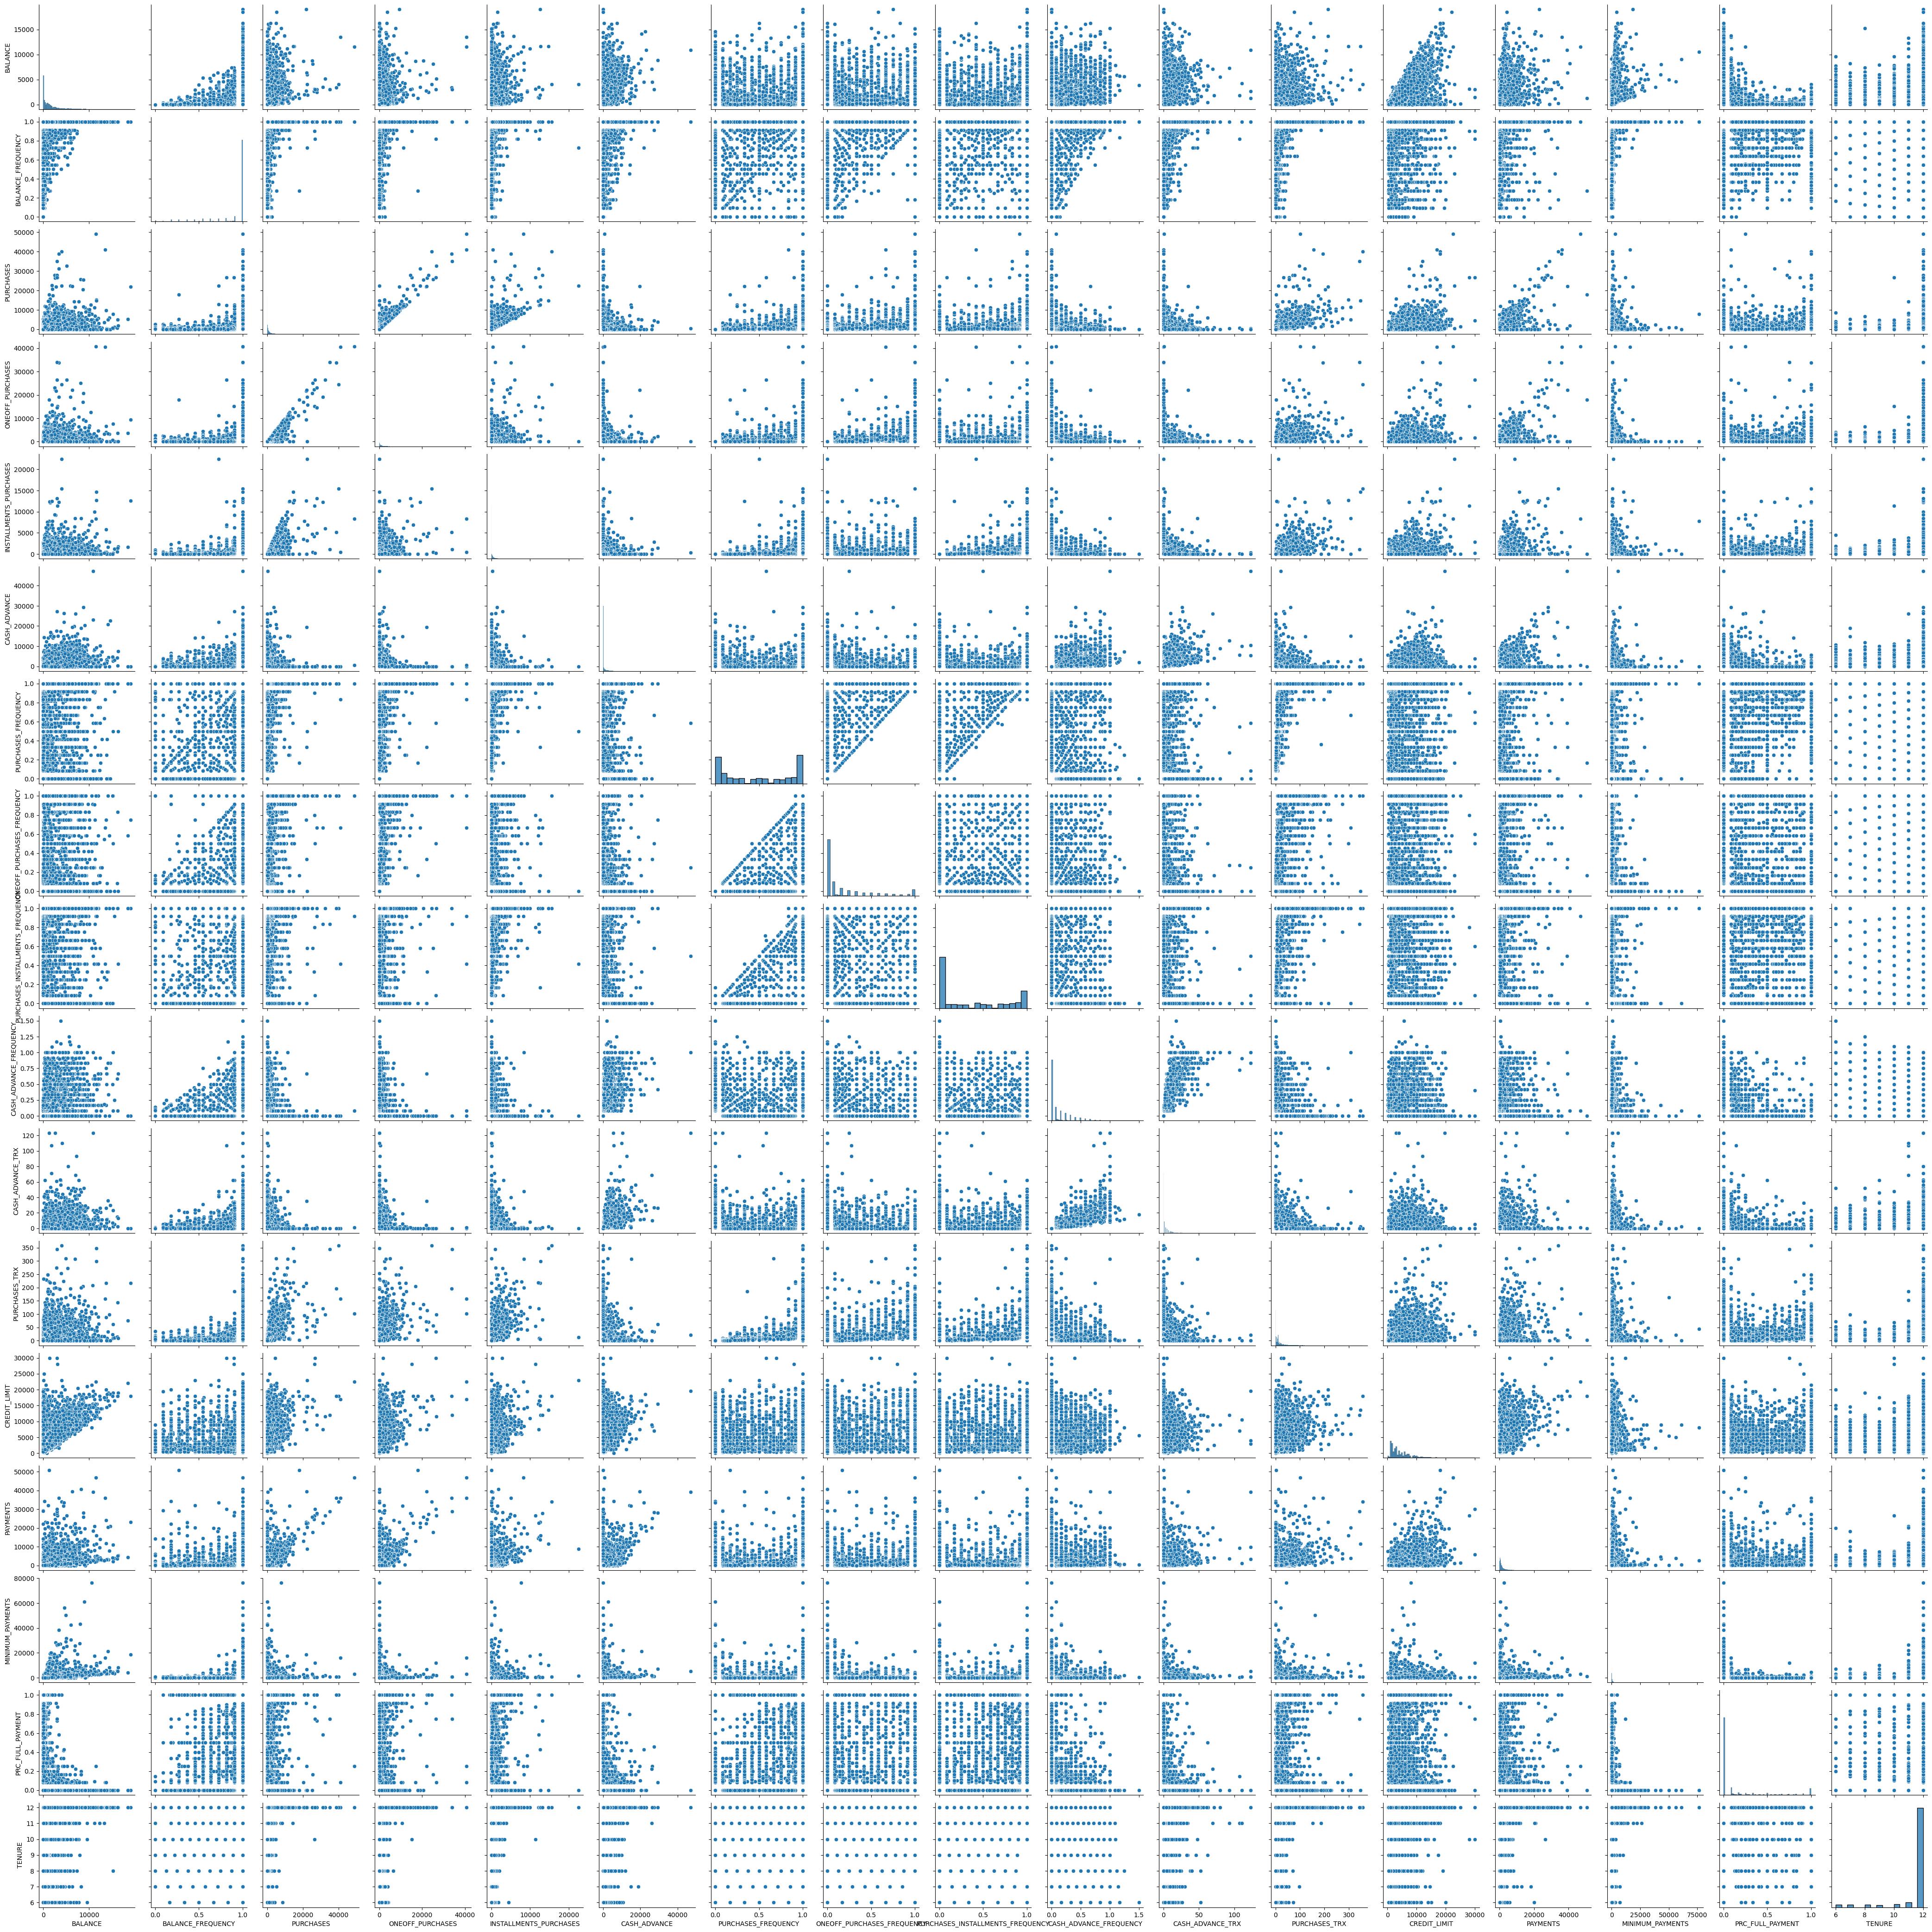

In [21]:
# Plot a pairplot with the "pastel" palette
sns.pairplot(df2, palette="pastel")
plt.show()

In [22]:
scaler= StandardScaler()
scaled_features=scaler.fit_transform(df2)
scaled_df=pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)
scaled_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.732054          -0.249881  -0.424934         -0.356957   
1     0.786858           0.134049  -0.469584         -0.356957   
2     0.447041           0.517980  -0.107716          0.108843   
3     0.049015          -1.017743   0.231995          0.546123   
4    -0.358849           0.517980  -0.462095         -0.347317   
...        ...                ...        ...               ...   
8944 -0.738015           0.517980  -0.333331         -0.356957   
8945 -0.742488           0.517980  -0.329174         -0.356957   
8946 -0.740463          -0.185895  -0.402000         -0.356957   
8947 -0.745239          -0.185895  -0.469584         -0.356957   
8948 -0.572644          -0.889766   0.042092          0.301677   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349114     -0.466805            -0.806649   
1                  -0.454607      2.605438            -1.221928   
2                  -0.454607     -0.466805             1.269742   
3                  -0.454607     -0.368678            -1.014290   
4                  -0.454607     -0.466805            -1.014290   
...                      ...           ...                  ...   
8944               -0.132688     -0.466805             1.269742   
8945               -0.122869     -0.466805             1.269742   
8946               -0.294930     -0.466805             0.854463   
8947               -0.454607     -0.449373            -1.221928   
8948               -0.454607     -0.406228             0.439186   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678716                         -0.707409   
1                      -0.678716                         -0.917090   
2                       2.673295                         -0.917090   
3                      -0.399383                         -0.917090   
4                      -0.399383                         -0.917090   
...                          ...                               ...   
8944                   -0.678716                          1.179720   
8945                   -0.678716                          1.179720   
8946                   -0.678716                          0.760359   
8947                   -0.678716                         -0.917090   
8948                    1.555959                         -0.917090   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675294         -0.476083      -0.511381     -0.960380   
1                   0.573949          0.110032      -0.591841      0.688601   
2                  -0.675294         -0.476083      -0.109082      0.826016   
3                  -0.258882         -0.329554      -0.551611      0.826016   
4                  -0.675294         -0.476083      -0.551611     -0.905414   
...                      ...               ...            ...           ...   
8944               -0.675294         -0.476083      -0.350461     -0.960380   
8945               -0.675294         -0.476083      -0.350461     -0.960380   
8946               -0.675294         -0.476083      -0.390691     -0.960380   
8947                0.157536         -0.183026      -0.591841     -1.097795   
8948                0.990362         -0.183026       0.333446     -0.905414   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
0    -0.529026         -0.300241         -0.525588  0.360541   
1     0.818546          0.099300          0.234159  0.360541   
2    -0.383857         -0.091322         -0.525588  0.360541   
3    -0.598733         -0.359995         -0.525588  0.360541   
4    -0.364421         -0.255148         -0.525588  0.360541   
...        ...               ...               ...       ...   
8944 -0.486266         -0.339056          1.183844 -4.126919   
8945 -0.503445         -0.024392         -0.525588 -4.126919   
8946 -0.570660         -0.324694          0

In [23]:
!pip install kneed

<div style="background-color: #f9f9f9; border-left: 6px solid #fda32c; padding: 10px; border-radius: 5px; font-family: Arial, sans-serif;">
    <h3 style="color: #fda32c;">Elbow Method for Optimal Clusters</h3>
    <p>
        <strong>Reason:</strong>
        <ul>
            <li><strong>Calculates Error (<code>inertia_</code>):</strong>
                <ul>
                    <li>Evaluates the sum of squared distances between data points and their cluster centroids for each number of clusters (1–20).</li>
                    <li>This measures how well data points fit into their respective clusters.</li>
                </ul>
            </li>
            <li><strong>Uses Elbow Method:</strong>
                <ul>
                    <li>Identifies the "elbow" point, where adding more clusters results in a diminishing reduction in error, indicating the optimal cluster count.</li>
                </ul>
            </li>
            <li><strong>KneeLocator:</strong>
                <ul>
                    <li>Automates the detection of the "elbow" point for precise cluster selection.</li>
                </ul>
            </li>
        </ul>
        This process ensures the optimal number of clusters is selected for KMeans clustering, balancing accuracy and simplicity.
    </p>
</div>


In [24]:
from kneed import KneeLocator

In [25]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [28]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 21 )
cluster_errors=[]
for k in cluster_range:
    kmeans= KMeans(n_clusters=k, **kmeans_set) #** open dictionry
    kmeans.fit(scaled_features)
    cluster_errors.append( kmeans.inertia_)

In [29]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

#clusters_df[0:21]
clusters_df.head(10)

num_clusters  cluster_errors
0             1   161082.000000
1             2   132375.877569
2             3   115949.384297
3             4   103852.883280
4             5    95770.519872
5             6    89182.482799
6             7    83739.477982
7             8    79072.545463
8             9    75175.469146
9            10    72323.866376

In [33]:
k1=KneeLocator(range(1,21),cluster_errors, curve='convex', direction='decreasing')
k1.elbow

6

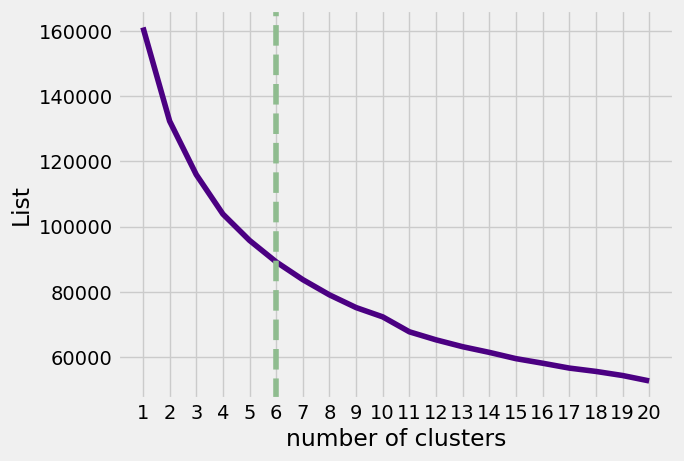

In [34]:
# Use the "fivethirtyeight" style for the plot
plt.style.use("fivethirtyeight")

# Plot the cluster errors against the number of clusters
plt.plot(range(1, 21), cluster_errors, color='indigo')
plt.xticks(range(1, 21))  # Set x-axis ticks for the number of clusters
plt.xlabel('Number of Clusters')  # Label for x-axis
plt.ylabel('Cluster Error')  # Label for y-axis

# Add a vertical line to indicate the optimal number of clusters
plt.axvline(x=k1.elbow, color='darkseagreen', label='Optimal Cluster (Elbow)', ls='--')

# Display the plot
plt.show()


## Detailed Scatter Plots
Reason:</br>
&emsp;Creates scatter plots for feature pairs to visually understand clustering patterns for key feature combinations.

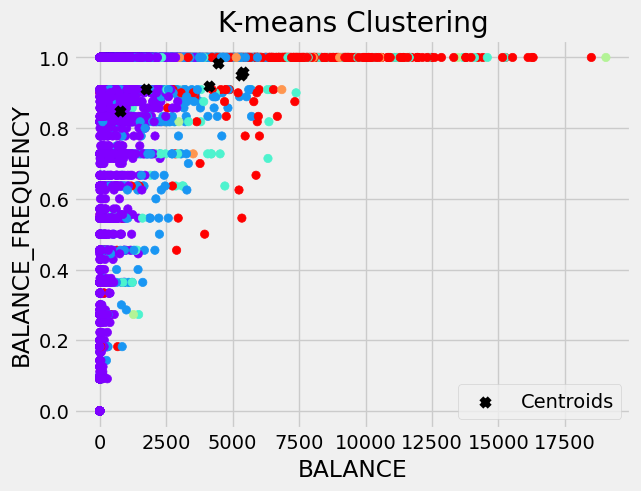

In [35]:
# Apply KMeans clustering with 6 clusters
kmeans = KMeans(n_clusters=6).fit(df2)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Scatter plot of the data points
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], c=kmeans.labels_, cmap='rainbow', label='Data Points')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Centroids')

# Add labels and title
plt.xlabel(df2.columns[0])  # Label for the x-axis (first feature)
plt.ylabel(df2.columns[1])  # Label for the y-axis (second feature)
plt.title('K-means Clustering')  # Title of the plot
plt.legend()  # Add a legend
plt.show()  # Display the plot


In [36]:
df2.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'PURCHASES_CATEGORY'],
      dtype='object')

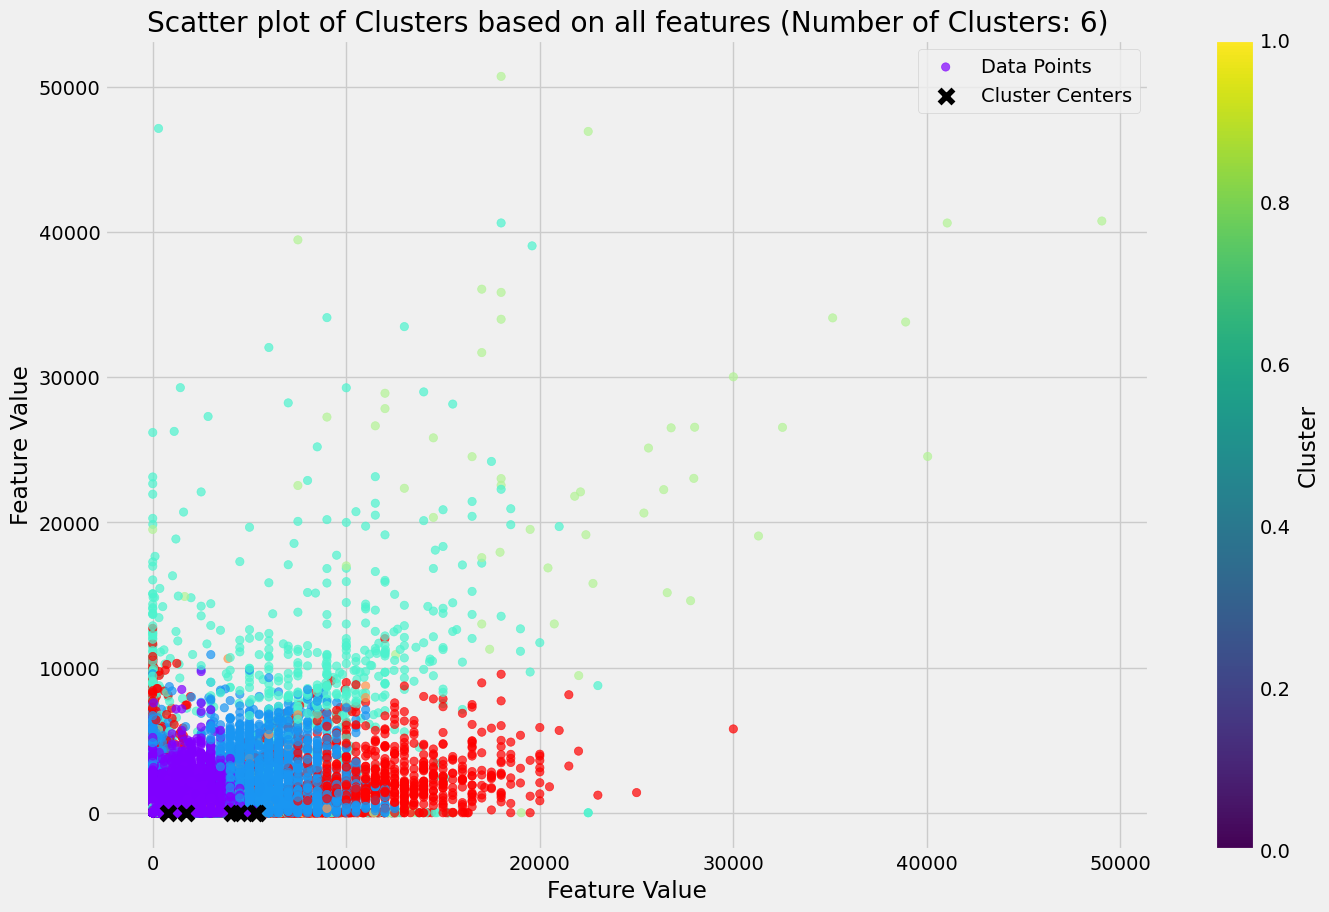

In [37]:
# Define feature pairs for scatter plots
feature_pairs = [
    ('BALANCE', 'BALANCE_FREQUENCY'),
    ('PURCHASES', 'ONEOFF_PURCHASES'),
    ('INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'),
    ('PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY'),
    ('PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'),
    ('CASH_ADVANCE_TRX', 'PURCHASES_TRX'),
    ('CREDIT_LIMIT', 'PAYMENTS')
]

# Create scatter plots for each pair
plt.figure(figsize=(15, 20))
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    plt.subplot(len(feature_pairs), 1, i + 1)
    plt.scatter(df2[x_feature], df2[y_feature], c=kmeans.labels_, cmap='rainbow', alpha=0.7, label='Data Points')
    
    # Plot cluster centers (if within the feature range)
    if x_feature in df2.columns and y_feature in df2.columns:
        plt.scatter(kmeans.cluster_centers_[:, df2.columns.get_loc(x_feature)],
                    kmeans.cluster_centers_[:, df2.columns.get_loc(y_feature)],
                    c='black', marker='x', s=100, label='Cluster Centers')

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Clusters based on {x_feature} and {y_feature}')
    plt.legend()

plt.tight_layout()
plt.show()

## Evaluate Clustering Quality
Reason:</br>
&emsp;Calculates metrics like <span style="color: black; font-weight: bold;">Cohesion </span>(intra-cluster distance), <span style="color: black; font-weight: bold;">Separation </span>(inter-cluster distance), <span style="color: black; font-weight: bold;">Silhouette Score, Calinski-Harabasz Index</span>, and <span style="color: black; font-weight: bold;">Dunn Index</span> to quantitatively assess the quality of clustering.

In [38]:
# Calculate distances of data points to cluster centroids
distances = pairwise_distances(df2, centroids, metric='euclidean')

# Calculate Cohesion: Sum of distances of points within each cluster to their respective centroids
cohesion = 0
for i in range(kmeans.n_clusters):
    cohesion += np.sum(distances[kmeans.labels_ == i, i])

cohesion /= len(df2)  # Normalize by the number of data points

# Calculate Separation: Average pairwise distance between cluster centroids
separation = 0
for i in range(kmeans.n_clusters):
    for j in range(i + 1, kmeans.n_clusters):
        separation += np.linalg.norm(centroids[i] - centroids[j])

separation /= kmeans.n_clusters * (kmeans.n_clusters - 1) / 2  # Normalize by number of unique centroid pairs

# Print results with colored output
print(Fore.BLUE + f"Cohesion: {cohesion}")
print(Fore.MAGENTA + f"Separation: {separation}")

Cohesion: 3209.021925199226
Separation: 25934.0488853354


In [39]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(df2, kmeans.labels_)

# Print the Silhouette Score with colored output
print(Fore.BLUE + f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3721391392625144


In [40]:
# Calculate the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(df2, kmeans.labels_)

# Print the Calinski-Harabasz Index with colored output
print(Fore.BLUE + f"Calinski-Harabasz Index: {calinski_harabasz}")

Calinski-Harabasz Index: 2559.242666112855


In [41]:
def dunn_index(data, labels):
    from sklearn.metrics import pairwise_distances
    import numpy as np
    
    # Compute pairwise distances between all points
    distances = pairwise_distances(data)
    
    # Calculate the maximum intra-cluster distance for each cluster
    max_intracluster_distances = np.max([
        np.max(distances[np.ix_(labels == i, labels == i)]) 
        for i in np.unique(labels)
    ])
    
    # Calculate the minimum inter-cluster distance between all clusters
    min_intercluster_distances = np.min([
        np.min(distances[np.ix_(labels == i, labels == j)])
        for i in np.unique(labels) for j in np.unique(labels) if i != j
    ])
    
    # Compute the Dunn Index
    dunn_index = min_intercluster_distances / max_intracluster_distances
    return dunn_index

# Compute the Dunn Index
dunn = dunn_index(df2, kmeans.labels_)
print(Fore.BLUE + f"Dunn Index: {dunn}")


Dunn Index: 0.004622848045570661


<div style="background-color: #f9f9f9; border-left: 6px solid #fda32c; padding: 10px; border-radius: 5px; font-family: Arial, sans-serif;">
    <h3 style="color: #fda32c;">Compare Metrics Across Cluster Sizes</h3>
    <p>
        <strong>Reason:</strong>
        <ul>
            <li>Iterates over a range of cluster sizes (2–10) and calculates the above metrics for each.</li>
            <li>Plots the results to help select the best cluster size based on the highest metric scores.</li>
        </ul>
    </p>
</div>


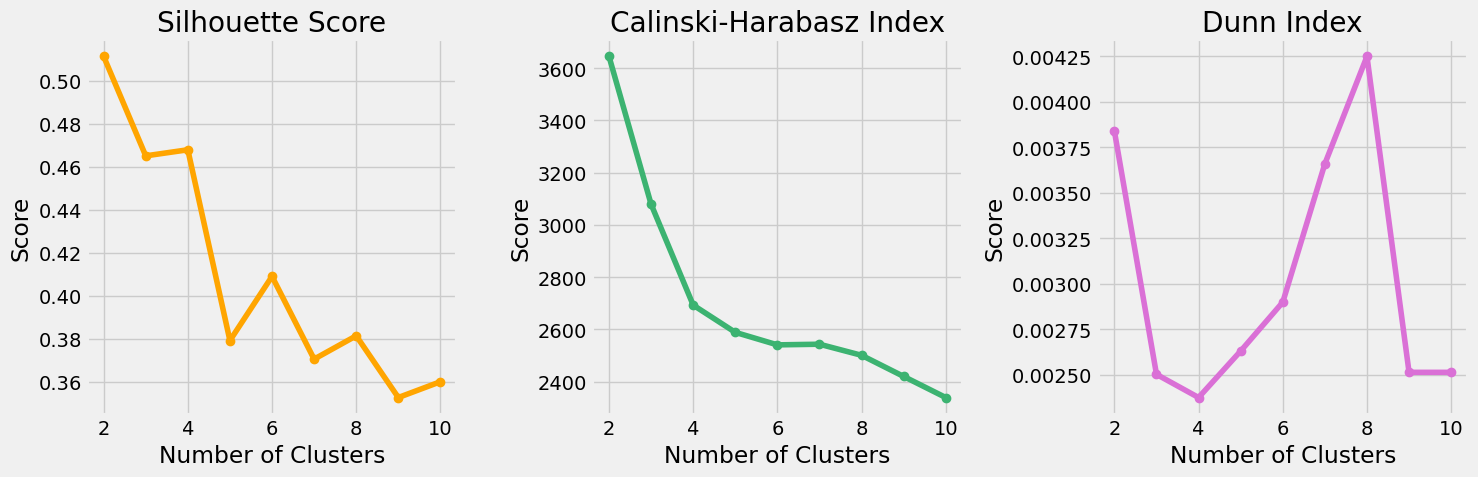

In [42]:
# Lists to store evaluation metrics
silhouette_scores = []
calinski_scores = []
dunn_scores = []

# Range of cluster numbers
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    # KMeans model with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df2)
    
    # Append evaluation metrics to respective lists
    silhouette_avg = silhouette_score(df2, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    calinski_harabasz = calinski_harabasz_score(df2, kmeans.labels_)
    calinski_scores.append(calinski_harabasz)
    
    dunn = dunn_index(df2.to_numpy(), kmeans.labels_)
    dunn_scores.append(dunn)

# Plot the metrics
plt.figure(figsize=(15, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

# Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(cluster_range, calinski_scores, marker='o', color='mediumseagreen')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

# Dunn Index
plt.subplot(1, 3, 3)
plt.plot(cluster_range, dunn_scores, marker='o', color='orchid')
plt.title('Dunn Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

<div style="background-color: #f9f9f9; border-left: 6px solid #fda32c; padding: 10px; border-radius: 5px; font-family: Arial, sans-serif;">
    <h3 style="color: #fda32c;">Identify Best Number of Clusters</h3>
    <p>
        <strong>Reason:</strong>
        <ul>
            <li><strong>Silhouette Score:</strong>
                <ul>
                    <li>Measures how well each data point fits within its cluster compared to other clusters.</li>
                    <li>Higher values indicate better-defined clusters.</li>
                </ul>
            </li>
            <li><strong>Calinski-Harabasz Index:</strong>
                <ul>
                    <li>Calculates the ratio of between-cluster dispersion to within-cluster dispersion.</li>
                    <li>A higher score indicates well-separated and compact clusters.</li>
                </ul>
            </li>
            <li><strong>Dunn Index:</strong>
                <ul>
                    <li>Compares the minimum inter-cluster distance to the maximum intra-cluster distance.</li>
                    <li>A higher score signifies better cluster separation and compactness.</li>
                </ul>
            </li>
        </ul>
        This section uses these metrics to determine the optimal number of clusters for the dataset.
    </p>
</div>


In [43]:


# Function to calculate the Dunn Index
def dunn_index(data, labels):
    from sklearn.metrics import pairwise_distances
    import numpy as np
    
    distances = pairwise_distances(data)  # Pairwise distances
    max_intracluster_distances = np.max([
        np.max(distances[np.ix_(labels == i, labels == i)]) 
        for i in np.unique(labels)
    ])
    min_intercluster_distances = np.min([
        np.min(distances[np.ix_(labels == i, labels == j)])
        for i in np.unique(labels) for j in np.unique(labels) if i != j
    ])
    return min_intercluster_distances / max_intracluster_distances

# Lists to store evaluation metrics
silhouette_scores = []
calinski_scores = []
dunn_scores = []

# Range of cluster numbers
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    # KMeans model with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df2)
    
    # Add evaluation metrics to respective lists
    silhouette_avg = silhouette_score(df2, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    calinski_harabasz = calinski_harabasz_score(df2, kmeans.labels_)
    calinski_scores.append(calinski_harabasz)
    
    dunn = dunn_index(df2.to_numpy(), kmeans.labels_)
    dunn_scores.append(dunn)

# Identify the best number of clusters based on evaluation metrics
best_silhouette = cluster_range[np.argmax(silhouette_scores)]
best_calinski = cluster_range[np.argmax(calinski_scores)]
best_dunn = cluster_range[np.argmax(dunn_scores)]

# Print the results
print(Fore.GREEN + f"Best number of clusters based on Silhouette Score: {best_silhouette}")
print(Fore.BLUE + f"Best number of clusters based on Calinski-Harabasz Index: {best_calinski}")
print(Fore.MAGENTA + f"Best number of clusters based on Dunn Index: {best_dunn}")
print(Style.RESET_ALL)

Best number of clusters based on Silhouette Score: 2
Best number of clusters based on Calinski-Harabasz Index: 2
Best number of clusters based on Dunn Index: 8



# <span style="color: #fda32c;">🌟 Finish 🌟</span>